## LU and QR Decomposition
Scroll to the bottom for the decompositions and explaination.

In [1]:
import numpy as np

In [2]:
# define a vector
u = np.array([7, 3, 5])
print(u)

print(np.linalg.norm(u), "\n")

# Create a 2x2 matrix
m2D = np.array([[1,3], [5,7]])
print(m2D)
print(np.linalg.norm(m2D))

[7 3 5]
9.1104335791443 

[[1 3]
 [5 7]]
9.16515138991168


In [3]:
m4D = np.array([[13, 3, 4, 5],
                [3, 5, 10, 8],
                [9, 6, 7, 12],
                [4, 16, 14, 1]])

#print second column
print(m4D[:, 1])

#print third row
print(m4D[2,:])

#print all but fourth row
print(m4D[: 3])

#print all but fourth column
print(m4D[: ,:3])

[ 3  5  6 16]
[ 9  6  7 12]
[[13  3  4  5]
 [ 3  5 10  8]
 [ 9  6  7 12]]
[[13  3  4]
 [ 3  5 10]
 [ 9  6  7]
 [ 4 16 14]]


### Matrix Multiplication
For a field $k$, if $A \in \text{GL}(n, j, k)$ and $B \in \text{GL}(j, m, k)$, then $AB \in \text{GL}(n, m, k)$.

For $n - 1$ codimension one vectors in $k^n$, we may take their cross product to obtain an orthogonal vector in $k^n$. This can be achieved with np.cross(). The dot product can be achieved with np.dot().

We can utilize np.dot to perform a matrix multiplication, which, as we recall, is noncommutative.

In [4]:
m1 = np.array([[3,1], [2,5]])
m2 = np.array([[4,2], [5,3]])
print(m1, "\n\n", m2, "\n")

print(np.dot(m1, m2))

[[3 1]
 [2 5]] 

 [[4 2]
 [5 3]] 

[[17  9]
 [33 19]]


In [5]:
# Noncommutative
print(np.dot(m2, m1))

[[16 14]
 [21 20]]


Some more ways of performing matrix operations:

In [6]:
# matrix element wise multiplication
print(m1 * m2)

# matrix element wise addition
print(m1 + m2)

[[12  2]
 [10 15]]
[[7 3]
 [7 8]]


In [7]:
# transpose a matrix
m = np.array([[4, 9, 2],
              [3, 5, 7],
              [8, 1, 6]])

m_t = np.transpose(m)

print(m)

# Ways of performing a transposition
print(m_t)
print(m.T)

[[4 9 2]
 [3 5 7]
 [8 1 6]]
[[4 3 8]
 [9 5 1]
 [2 7 6]]
[[4 3 8]
 [9 5 1]
 [2 7 6]]


In [8]:
print(np.linalg.det(m))
print(np.linalg.det(m_t))

359.9999999999997
360.00000000000006


Taking the inverse of an arbitrary matrix is always expensive, as it requires a determinant be calculated - which is $O(n^3)$, versus running Gauss-Jordan, which is $O(n^2)$. Doing operations similar to Gauss-Jordan, such as LU and QR decomposition, will enable us to solve linear systems far faster than simply inverting a square matrix.

In [9]:
# # O(n^2) for n the number of rows (which is equal to the number of columns in this case)
m_inv = np.linalg.inv(m)
print(m_inv)

[[ 0.06388889 -0.14444444  0.14722222]
 [ 0.10555556  0.02222222 -0.06111111]
 [-0.10277778  0.18888889 -0.01944444]]


In [10]:
# O(n^2) for n the number of rows
print(np.dot(m, m_inv))

[[ 1.00000000e+00  0.00000000e+00 -3.46944695e-17]
 [ 1.24900090e-16  1.00000000e+00 -6.59194921e-17]
 [ 2.77555756e-17  0.00000000e+00  1.00000000e+00]]


Instead we can perform LU and QR Decompositions. For a given square matrix $M$, we may decompose it into a product of two matricies. Here are their properties:

## LU Decomposition

$M = LU$, where $L$ is a lower-triangular matrix, meaning a triangular matrix with nonzero entries located only below its diagonal. Similarly, $U$ is an upper-triangular matrix, with nonzero entries only located above its diagaonal (in both cases they can be on the diagonal as well). We enjoy these types of matricies as they are very fast to invert, multiply, and solve systems using a process called back-substitution (they run in $O(n^2)$, while the inversion method runs in $O(n^3)$, giving us huge time-savings for large systems of linear equations). For more details, simply consult this wonderful summary from UC Davis' Math Department: https://www.math.ucdavis.edu/~linear/old/notes11.pdf.

## QR Decomposition

$M = QR$, where $Q$ is a real orthogonal matrix located in $O(n)$, the $n \times n$ orthogonal group, and $R$ is an upper triangular matrix. This process has the added benefit that it is unique for invertible $M$. Another advantage of this process is that it provides a faster way to invert $M$, should we want to compute that without evaluating an expensive, $O(n^3)$ determinant. Since $Q$ is orthogonal, it satisfies $QQ^T = I$, meaning its transpose is its inverse. Transposing a matrix can be done in $O(n)$ operations. Similarly, inverting $R$, a triangular matrix, can be done in $O(n^2)$ operations, via backsubstitution (see: https://en.wikipedia.org/wiki/Triangular_matrix#Forward_and_back_substitution). Then, this means a QR decomposition and the inverse of a nonsingular matrix $M \in GL(n,k)$, where $k = \R$ in this case, can be done in $O(n^2)$ operations, giving us a huge speedup.

$$M^{-1} = R^{-1} Q^{-1}.$$

In fact, a QR decomposition leads to some pretty interesting theoretical results too! If you are looking at some fun Lie Group stuff, or frames of physical systems that is. I know from my math perspective that its already pretty nice. Here is a nice writeup about performing a QR decomposition using the Gram-Schmidt method: https://www.math.ucla.edu/~yanovsky/Teaching/Math151B/handouts/GramSchmidt.pdf

In [11]:
def myLU(A):
    n = len(A)
    L = np.eye(n, dtype=float)  # Initialize L as the identity matrix with float dtype
    U = A.astype(float)         # Initialize U as a copy of A with float dtype

    for k in range(n-1):
        for i in range(k+1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:n] -= L[i, k] * U[k, k:n]

    return L, U

def l_solve(L, b):
    n = len(b)
    x = np.zeros_like(b, dtype=float)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def u_solve(U, y):
    n = len(y)
    x = np.zeros_like(y, dtype=float)

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

def myQR(A):
    n, m = A.shape # get the shape of A

    Q = np.empty((n, n)) # initialize matrix Q
    u = np.empty((n, n)) # initialize matrix u

    u[:, 0] = A[:, 0]
    Q[:, 0] = u[:, 0] / np.linalg.norm(u[:, 0])

    for i in range(1, n):
        u[:, i] = A[:, i]
        for j in range(i):
            u[:, i] -= (A[:, i] @ Q[:, j]) * Q[:, j] # get each u vector
        Q[:, i] = u[:, i] / np.linalg.norm(u[:, i]) # compute each e vetor

    R = np.zeros((n, m))
    for i in range(n):
        for j in range(i, m):
            R[i, j] = A[:, j] @ Q[:, i]

    return Q, R

##### Example 1:

In [12]:
A = np.array([
    [3, 6, 8],
    [2, 7, -1],
    [5, 2, 2]
])

b = np.array([-13, 4, 1])

In [13]:
L, U = myLU(A)

In [14]:
L

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.66666667,  1.        ,  0.        ],
       [ 1.66666667, -2.66666667,  1.        ]])

In [15]:
U

array([[  3.        ,   6.        ,   8.        ],
       [  0.        ,   3.        ,  -6.33333333],
       [  0.        ,   0.        , -28.22222222]])

In [16]:
y = l_solve(L, b)

In [17]:
y

array([-13.        ,  12.66666667,  56.44444444])

In [18]:
x = u_solve(U, y)

In [19]:
x

array([ 1.,  0., -2.])

In [20]:
np.dot(A, x)

array([-13.,   4.,   1.])

##### Example 2

In [21]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
])

b = np.array([1, 0, 2])

In [22]:
Q, R = myQR(A)

In [23]:
x = u_solve(R, np.dot(Q.T, b))

In [24]:
x

array([-2.        ,  2.        , -0.33333333])

In [25]:
np.dot(A, x)

array([ 1.00000000e+00, -1.27675648e-14,  2.00000000e+00])

## An aside on Vandermode matricies and eigenvalue/vector solving

I did want to write up a separate section detailing these, so instead I just included them as code from two previous problems I did for extra credit. Enjoy!

#### Problem 4.52

Consider $A$, our $11 \times 3$ Vandermode matrix based on the data we gathered. Let $x$ be the coefficients for our polynomial function and $b$ the values of the data we recorded in the second column of our data. Then, we have $Ax = b$. We see that $A^t A$ is a $3 \times 3$ matrix, and we may perform a QR decomposition on this to obtain the following equations:

$$A^t A x = A^t b$$
$$QR x = A^t b$$
$$Rx = Q^t A^t b$$

We may perform back-substitution on $Rx$ to obtain our coefficients in $x$.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
URL1 = 'https://raw.githubusercontent.com/NumericalMethodsSullivan'
URL2 = '/NumericalMethodsSullivan.github.io/master/data/'
URL = URL1+URL2
data = np.array( pd.read_csv(URL+'Exercise4_52.csv') )

# Vandermode Matrix generation:
# print(data) # Debug
x_vec = data[:, 0]
values = data[:, 1].transpose()
# print(x_vec, "\n", values, np.shape(values)) # Debug
vand = np.array([ [x_vec[i]**2, x_vec[i], 1] for i in range(len(x_vec)) ])
# print(vand) # Debug

In [28]:
# QR Decomposition and Back-substitution
vand_t = vand.transpose()
tr_mult = vand_t @ vand
Q_vand, R_vand = myQR(tr_mult)
# print(Q_vand, type(Q_vand), "\n", vand_t, type(vand_t))
Q_vand_t = Q_vand.transpose()
transformed_values = np.dot(Q_vand_t, vand_t.dot(values))

In [29]:
# Solutions
sol = u_solve(R_vand, transformed_values)
a = sol[0]
b = sol[1]
c = sol[2]
sol

array([ 13.02913753, -12.19319347,  15.23706294])

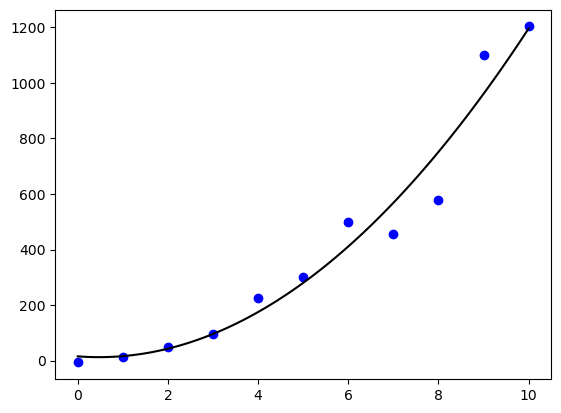

In [30]:
# Plotting our function against given values
# -- Data --
plt.scatter(x_vec, values, c='blue')
# -- Line of best fit --
x = np.linspace(0, 10, 10**2)
f = lambda x: (a * (x**2)) + (b * x) + c
plt.plot(x, f(x), c='black')
plt.show()

##### Ex: 4.86

We understand that the matrix $A$ is singular from its LU-decomposition. The upper triangular matrix has a zero along its diagonal. This means that the standard methods for solving for eigenvectors cannot work as desired. So, we turn to an alternative method for calculating eigenvalues and their corresponding eigenvectors. We can assume that the eigenvector of $A$ is at a stable equilibrium at the maximum eigenvalue, and by convexity this tell us that when we are sufficiently close to the eigenvector. The equation we shall iterate is

$$x_{n + 1} = A \hat{x_n}$$

where $\hat{x_n}$ denotes the normalization of a vector. We see that if $\hat{x_{n+1}} - \hat{x_n}$ is sufficiently close to zero, then we are reaching an equilibrium. Similarly, $\langle \hat{x_{n+1}}, \hat{x_n} \rangle = \lambda$ is the maximum eigenvalue of $A$. We start with a random normalized vector and proceed this way over a set number of iterations.

In [ ]:
A = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 0, 1, 2],
    [3, 4, 5, 6]
])

myLU(A)

(array([[1. , 0. , 0. , 0. ],
        [5. , 1. , 0. , 0. ],
        [9. , 4.5, 1. , 0. ],
        [3. , 0.5, 0. , 1. ]]),
 array([[  1.,   2.,   3.,   4.],
        [  0.,  -4.,  -8., -12.],
        [  0.,   0.,  10.,  20.],
        [  0.,   0.,   0.,   0.]]))

In [32]:
def normalize_vector(v):
    return v / np.linalg.norm(v)

def eigenvalues_and_eigenvectors(A, max_iter=1000, tol=1e-8):
    # Eigenvalue + Eigenvector calculation - based on supremum method
    eigenvector = np.random.rand(len(A))  # Random initial guess for eigenvector
    eigenvector = normalize_vector(eigenvector)
    for _ in range(max_iter):
        eigenvector_next = A.dot(eigenvector)
        eigenvalue = np.dot(eigenvector_next, eigenvector)
        eigenvector_next = normalize_vector(eigenvector_next)
        if np.linalg.norm(eigenvector_next - eigenvector) < tol:
            break
        eigenvector = eigenvector_next

    return eigenvalue, eigenvector

In [35]:
e_val, e_vec = eigenvalues_and_eigenvectors(A)
print(e_val, e_vec)

12.122893771262424 [0.29982463 0.70747178 0.63999131]


In [36]:
print("The largest eigenvalue is:", e_val)
print("The corresponding eigenvector is:", e_vec)

The largest eigenvalue is: 12.122893771262424
The corresponding eigenvector is: [0.29982463 0.70747178 0.63999131]
